In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# 1. Load processed dataset
df = pd.read_csv('/Users/alokranjansingh/Desktop/uidaiiiii/migra-view-uidai/data/processed/processed_aadhaar_data.csv')


In [ ]:
# 2. Format data for Prophet
# Prophet requires two specific columns: 'ds' (date) and 'y' (value)
df_prophet = df.groupby('date')['bio_age_5_17'].sum().reset_index()
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [ ]:
# 3. Initialize and Fit the Model
# enable yearly and weekly seasonality to capture societal trends
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)



15:09:20 - cmdstanpy - INFO - Chain [1] start processing
15:09:21 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# 4. Create Future Dates (Predicting next 90 days)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)



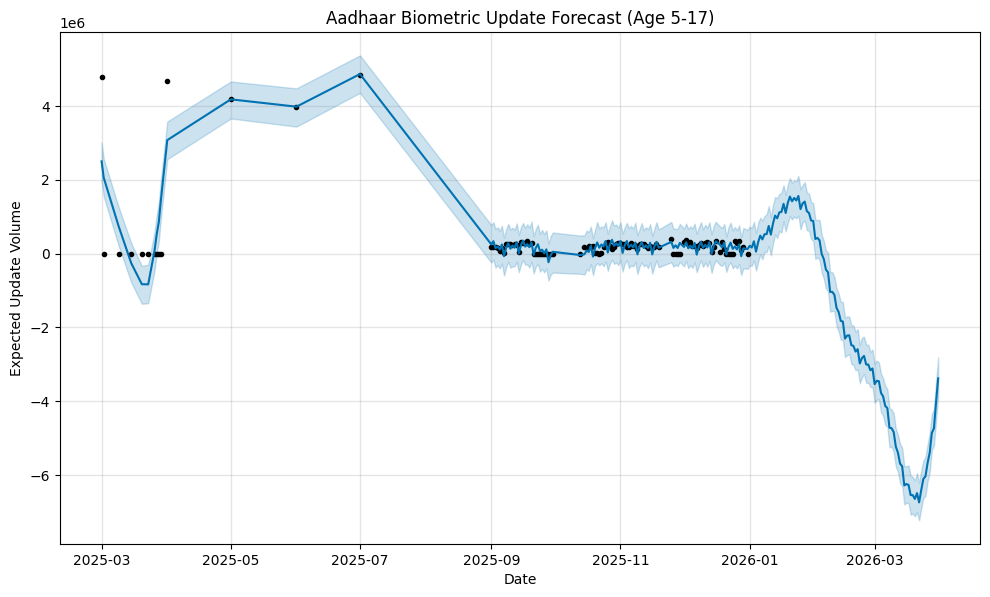

In [9]:
# 5. Visualize the Forecast
fig1 = model.plot(forecast)
plt.title("Aadhaar Biometric Update Forecast (Age 5-17)")
plt.xlabel("Date")
plt.ylabel("Expected Update Volume")
plt.show()



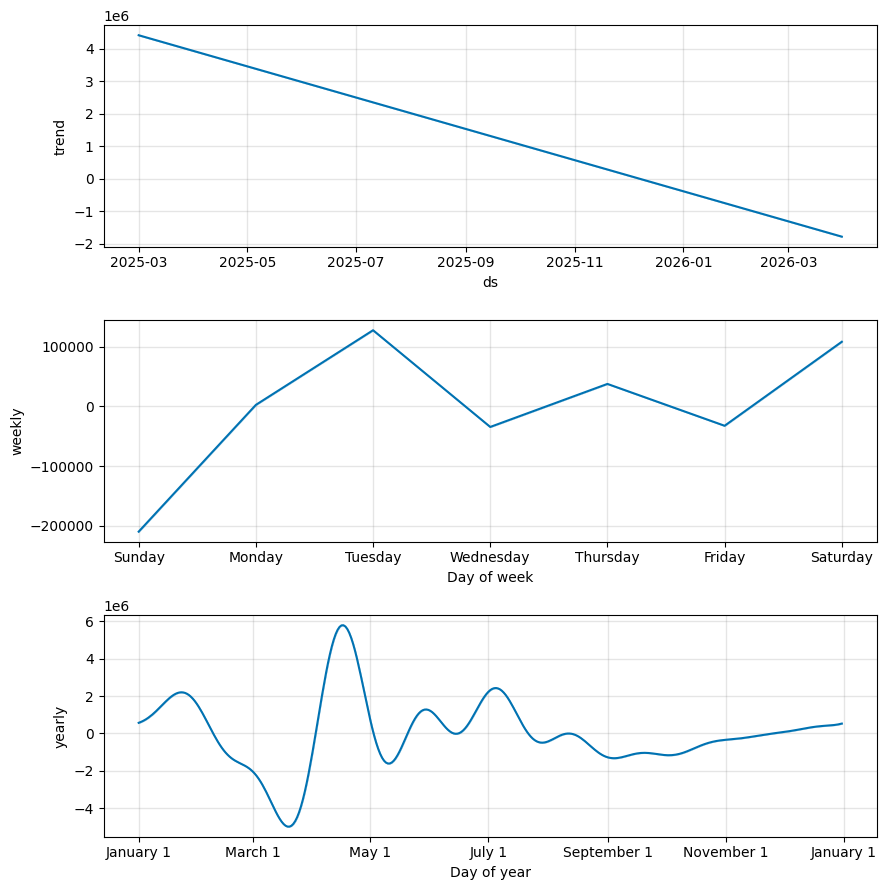

In [ ]:
# 6. Break down the components 
# This shows exactly when the 'spikes' happen (e.g., which months or days)
fig2 = model.plot_components(forecast)
plt.show()

In [12]:
# Cross validation
from prophet.diagnostics import cross_validation, performance_metrics

# Measures how well your model would have performed in the past
df_cv = cross_validation(model, initial='100 days', period='30 days', horizon='90 days')
df_p = performance_metrics(df_cv)

print("Model Accuracy (MAE):", df_p['mae'].mean())

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/4 [00:00<?, ?it/s]15:15:16 - cmdstanpy - INFO - Chain [1] start processing
15:15:16 - cmdstanpy - INFO - Chain [1] done processing
15:15:16 - cmdstanpy - INFO - Chain [1] start processing
15:15:16 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:00<00:00, 17.94it/s]15:15:16 - cmdstanpy - INFO - Chain [1] start processing
15:15:16 - cmdstanpy - INFO - Chain [1] done processing
15:15:16 - cmdstanpy - INFO - Chain [1] start processing
15:15:16 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:00<00:00, 12.52it/s]

Model Accuracy (MAE): 32514769.873729352


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/12 [00:00<?, ?it/s]15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
 17%|█▋        | 2/12 [00:00<00:00, 15.67it/s]15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
 42%|████▏     | 5/12 [00:00<00:00, 20.11it/s]15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - Chain [1] done processing
15:18:40 - cmdstanpy - INFO - Chain [1] start processing
15:18:40 - cmdstanpy - INFO - C

  horizon           mse          rmse           mae       mdape     smape  \
0  4 days  4.312550e+14  2.076668e+07  8.975755e+06    2.088735  1.344022   
1  5 days  6.087482e+14  2.467282e+07  1.093484e+07    2.088735  1.560279   
2  6 days  6.926181e+14  2.631764e+07  1.209393e+07   27.299964  1.727595   
3  7 days  6.994014e+14  2.644620e+07  1.248018e+07  105.915790  1.731816   
4  8 days  8.220185e+14  2.867086e+07  1.358463e+07    6.865619  1.661622   

   coverage  
0  0.614035  
1  0.526316  
2  0.350877  
3  0.242105  
4  0.189474  



/Users/alokranjansingh/Desktop/uidaiiiii/.venv/lib/python3.14/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/alokranjansingh/Desktop/uidaiiiii/.venv/lib/python3.14/site-packages/prophet/plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


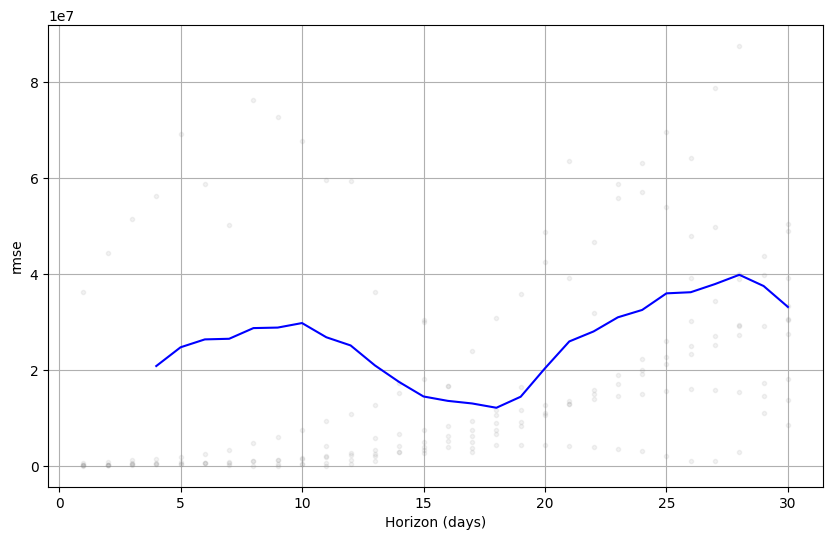

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric


df_cv = cross_validation(model, initial='60 days', period='15 days', horizon='30 days')

# 2. Extract metrics
df_p = performance_metrics(df_cv)
print(df_p.head())

# 3. FIX: Check if df_p is valid before plotting to avoid the TypeError
if df_p is not None:
    fig = plot_cross_validation_metric(df_cv, metric='rmse') # Using RMSE instead of MAPE
else:
    print("Not enough data for cross-validation metrics yet.")